<a href="https://colab.research.google.com/github/lmcanavals/analytics_visualization/blob/main/notebooks/ea_Interactive_controls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
x = np.arange(1, 15)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
y = x * 5
y

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

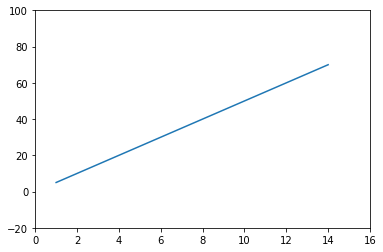

In [ ]:
plt.plot(x, y)
plt.axis([0, 16, -20, 100])
plt.show()

In [ ]:
def f(m):
  y = x * m
  plt.plot(x, y)
  plt.axis([0, 16, -20, 100])

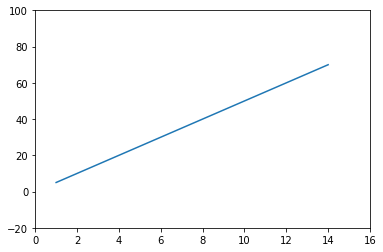

In [ ]:
f(5)

In [ ]:
interact(f, m=1)

interactive(children=(IntSlider(value=1, description='m', max=3, min=-1), Output()), _dom_classes=('widget-int…

<function __main__.f>

In [ ]:
interact(f, m=(1, 7))

interactive(children=(IntSlider(value=4, description='m', max=7, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.f>

In [ ]:
def f(m, b):
  y = x * m + b
  plt.plot(x, y)
  plt.axis([0, 16, -20, 100])

In [ ]:
interact(f, m=(1, 7), b=(-10, 10))

interactive(children=(IntSlider(value=4, description='m', max=7, min=1), IntSlider(value=0, description='b', m…

<function __main__.f>

In [ ]:
def f(m, b, xmin, xmax, ymin, ymax):
  y = x * m + b
  plt.plot(x, y)
  plt.axis([xmin, xmax, ymin, ymax])

In [ ]:
interact(f, m=(1, 7), b=(-10, 10),
         xmin=(-10, 10), xmax=(10, 20), ymin=(-30, 20), ymax=(10, 200))

interactive(children=(IntSlider(value=4, description='m', max=7, min=1), IntSlider(value=0, description='b', m…

<function __main__.f>

In [ ]:
def f(a, b):
  return a + b

In [ ]:
interact(f, a=(1, 100), b=(1, 100))

interactive(children=(IntSlider(value=50, description='a', min=1), IntSlider(value=50, description='b', min=1)…

<function __main__.f>

In [ ]:
interact(f, a=(1, 10, 0.5), b=(1, 10, 0.5))

interactive(children=(FloatSlider(value=5.0, description='a', max=10.0, min=1.0, step=0.5), FloatSlider(value=…

<function __main__.f>

In [ ]:
interact(f, a=range(1, 10, 2), b=range(1, 10, 3))

interactive(children=(Dropdown(description='a', options=(1, 3, 5, 7, 9), value=1), Dropdown(description='b', o…

<function __main__.f>

In [ ]:
data = {
    'a': np.arange(1, 15),
    'b': np.arange(1, 15) ** 2,
    'c': np.arange(1, 15) + 2.5,
    'd': np.arange(1, 15) ** .5,
}

In [ ]:
def f2(x, y):
  plt.scatter(data[x], data[y])

In [ ]:
cols = ['a', 'b', 'c', 'd']
interact(f2, x=cols, y=cols)

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c', 'd'), value='a'), Dropdown(description…

<function __main__.f2>

In [ ]:
def f3(val: bool):
  if val:
    return "hola"
  else:
    return "chao"

In [ ]:
interact(f3, val=False)

interactive(children=(Checkbox(value=False, description='val'), Output()), _dom_classes=('widget-interact',))

<function __main__.f3>

In [ ]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = ''  #@param {type: "string"}
slider_value = 131  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


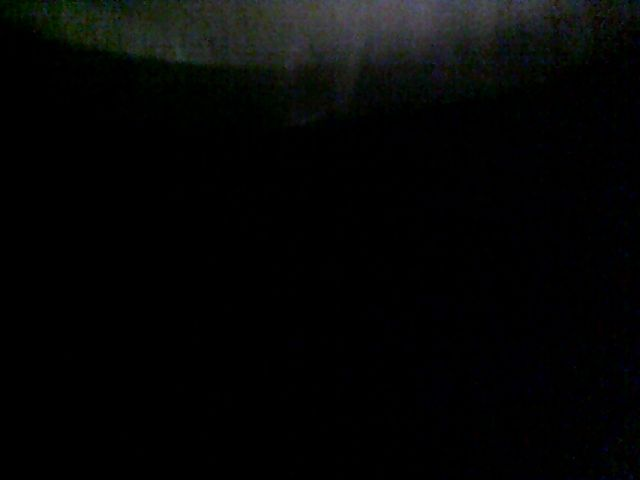

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import matplotlib.image as mpimg

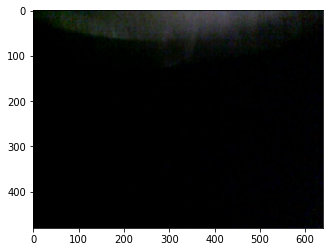

In [ ]:
img = mpimg.imread("photo.jpg", format="jpeg")
plt.imshow(img)